# Evaluating Gene Correlations - Definitive endoderm

In [1]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import matplotlib.pyplot as plt


from moscot.problems.time._lineage import TemporalProblem

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
Path="/home/mgander/Unrelated/moscotTime_Reproducibility/Data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

In [3]:
ct='E7.25:Definitive endoderm'
i=7

ts0=ts[i]
ts1=ts[i+1]

In [4]:
gT=np.load(f"{Path}/TOME_transport_maps/{ts0}_{ct}_pull.npy", allow_pickle=True)
gM=np.load(f"{Path}/moscot_maps/{ts0}_{ct}_pull.npy", allow_pickle=True)

# Correlation for curated genes

The following list of genes was obtained by litarture seach when looking for genes that predict deveopment into first heart field cells. The key in the dictionary corresponds to the citation (Pubmed ID), and the values correspond to the genes the publication lists.

TOME used the following genes to identify the first heart field cluster: Tbx5, Hcn4, Gata4.

In [5]:
# Definitive endoderm

# Nodal is meso+endoderm specific, but seems to be involed more in endoderm !!!,Nodal=Smad?
# Noggin (Nog) and Chordin maybe not, mybe to mesoendodermal

D={}

D['PMID: 34988400']=['Sox17', 'Nodal', 'Tdgf1', 'Inhba']

D['PMID: 30038254']=['Foxa2']

# Organoids, hence rather weak evidence
D['PMID: 24973948']=['Nanog','Eomes', 'Gata6','Smad2']

# Most genes in here are only linked to lack of endoderm formation in the respective double negative mutant mouse,
# hence gene expression of endoderm cells does not necessarily have to correlate...
D['PMID: 17387317']=['Amot', 'Mixl1', 'Nckap1', 'Lhx1', 'Inhba', 'Foxh1']


# weak-ish evidence
D['PMID: 16752393']=['Gata4', 'Furin', 'Nodal', 'Mixl1', 'Ctnnb1',
                    'Cdx2', 'Otx2', 'Lhx1','Pax1', 'Pax9', 'Hoxa3', 'Fgf8', 'Shh', 'Tbx1', 'Hoxa13', 
                     'Gata5',  'Iapp', 'Pklr', 'Smad3' ]
# strong evidence:
D['PMID: 16752393, strong evidence']=['Hnf4a', 'Ihh', 'Afp', 'Alb', 'Foxa2',  'Dkk1', 'Cer1', 'Sox17', 'Irx3', 
                     'Irx1', 'Pax1', 'Hhex', 'Bmpr1a']

D['PMID: 18213590']=['Cldn6',  'Shh', 'Sox17', 'Foxa3',  'Foxa1', 'Foxa2']

D['https://www.rndsystems.com/research-area/definitive-endoderm-markers']=['Cldn6', 'Eomes', 'Fabp1', 'Fabp2',
                                                                          'Gata4', 'Foxa1', 'Foxa2', 'Sox7',
                                                                           'Sox17', 'Hnf1b' ]

D['PMID: 27534536']=['Cer1', 'Eomes', 'Gata6', 'Lefty1', 'Cxcr4']

D['PMID: 34450036']=['Hnf1b']

# Proves Gata6 involvement on definitve endoderm development really well for humans
D['PMID: 34010638']=['Gata6']



D['PMID: 17576135']=['Tmprss2', 'Plet1', 'Dsp', 'Klf5', 'Epha2']

genes=[]
for a in D.values():
    genes=[*genes, *a]

# Eliminate duplicates
genes=[a for a in set(genes)]

In [6]:
adata=sc.read(f"{Path}/anndatas/scVI_anndatas/scvi_adata_{ts0}.h5ad")
adata.var.index=list(adata.var['gene_names'])

In [7]:
hvgs=list(adata.var[adata.var['highly_variable']]['gene_names'])
genes_selected=[]
for gene in genes:
    if gene in hvgs:
        genes_selected.append(gene)

In [10]:
len(genes_selected)

37

In [9]:
len(genes)

51

In [13]:
[print(a+', ') for a in genes_selected]

Otx2, 
Foxa1, 
Dkk1, 
Fabp2, 
Hnf1b, 
Klf5, 
Cdx2, 
Smad3, 
Gata6, 
Hnf4a, 
Epha2, 
Plet1, 
Ihh, 
Lefty1, 
Cer1, 
Lhx1, 
Amot, 
Irx3, 
Eomes, 
Nanog, 
Tmprss2, 
Foxa2, 
Foxa3, 
Nodal, 
Afp, 
Gata4, 
Dsp, 
Fabp1, 
Mixl1, 
Irx1, 
Sox17, 
Hhex, 
Cxcr4, 
Fgf8, 
Cldn6, 
Sox7, 
Tdgf1, 


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
subset=True

DF=pd.DataFrame({})

for gene in genes_selected:
    loc=adata.var.index.get_loc(gene)
    exp=adata.layers['scvi_normalized'][:,loc]
    #exp=adataS.X[:,loc]
    #exp=np.array(exp.todense()).T[0]

    if subset==True:
        wh=np.where(adata.obs['cell_state']=='E7:Anterior primitive streak')[0]
        exp=exp[wh]
        gT2=gT[wh]
        gM2=gM[wh]
    else:
        gT2=gT.copy()
        gM2=gM.copy()


    (cor, p)=scipy.stats.spearmanr(exp, gT2)
    dfT=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'TOME', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    (cor, p)=scipy.stats.spearmanr(exp, gM2)
    dfM=pd.DataFrame({'Timepoint': ts0, 'Gene':[gene], 'Method': 'moscot', 'Correlation':cor, 'P-value':p, 'type':'Spearman'})
    DF=pd.concat([DF, dfM,dfT])
DF['Abs. Correlation']=abs(DF['Correlation'])
DF.index=np.arange(len(DF))

<Axes: xlabel='Abs. Correlation', ylabel='Timepoint'>

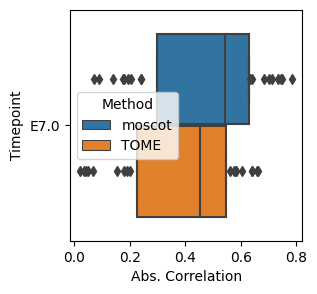

In [12]:
fig, ax = plt.subplots(ncols=1, figsize=(3, 3))
sns.boxplot(data=DF, x="Abs. Correlation", y="Timepoint", hue='Method', showfliers=True,
               showmeans=False,  whis=[100,0], ax=ax)

In [13]:
DF.to_pickle(f'{Path}/Correlations/{ts0}_DE.npy')